# Due Apr 6 at 5pm
# Please submit your homework with file name: HW10_Lastname_firstname.ipynb

# Basic Monte Carlo 


#  Monte Carlo and other estimation methods

##### Keywords: monte-carlo, integration,  central limit theorem

### Approximate the following integral using different methods. Compare their computing time and errors

**Calculate the integral $ I= \int_{0}^{2} [x^3 + 4 \, x \,\sin(x)] \, dx. $**


1. Use Monte Carlo simulation to obtain 
    1. Imc == an array of approximation of I (For $K \in [1,2,3,4... 10000]$)  with K samples 
    1. mc_err == an array of errors the approximations, 
    1. mc_time== an array of computing time of each approximation
1. Use Rectangle with Midpoint Method to obtain 
    1. Imidpt == an array of approximation of I (For $K \in [1,2,3,4... 10000]$)  with K iterations. 
    1. midpt_err == an array of errors the approximations, 
    1. midpt_time == an array of computing time of each approximation

1. Use trapezoid Rule with K iterations to obtain 
    1. Itrapz == an array of approximation of I (For $K \in [1,2,3,4... 10000]$), with K iterations. 
    1. trapz_err == an array of errors of the approximations,
    1. trapz_time == an array of computing time of each approximation
    
### Now plot the following 2 graphs
1.  a graph whose x axis is number of simulations (iterations) $[1,2,3,4... 10000]$; whose $y$ axis consists of mc_err (red), midpt_err(green), and trapz_err(blue). Note you should use different colors for different $y$ and label them correspondingly. Then add three curves: $1/\sqrt{simulations}$ (red) , and $1/(simulations^2)$(green), and $1/(simulations^3)$ (blue)

1.  a graph whose x axis is number of simulations (iterations) $[1,2,3,4... 10000]$; whose $y$ axis consists of mc_time (red), midpt_time(green), and trapz_time(blue). Note you should use different colors for different $y$ and label them correspondingly. 


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time


In [10]:
def f(x):
    return ( x**3 + 4.*x*np.sin(x) )

def intf(x):
    return (0.25*x**4 - 4.*x*np.cos(x) + 4*np.sin(x))

def midpt_int(func,a,b,n):
    delta_x = (b-a)/n
    mid_x   = np.arange(a,b,delta_x) + delta_x/2
    estimate= np.sum(f(mid_x)) * delta_x
    return estimate

def trapz_int(func,a,b,n):
    delta_x = (b-a)/n
    left_x  = np.arange(a,b,delta_x)
    right_x = left_x + delta_x
    estimate= np.sum( f(left_x)+f(right_x) ) *(delta_x/2)
    return estimate

a = 0.
b = 2.
N = int(1e4)
exactval = intf(b) - intf(a)

## Imc == an array to store approximation of I (For $K \in [1,2,3,4... 10000]$)  with K samples 
## Imidpt == an array  to store approximation of I (For $K \in [1,2,3,4... 10000]$)  with K iterations. 
## Itrapz == an array  to store approximation of I (For $K \in [1,2,3,4... 10000]$), with K iterations. 

In [11]:
Imc    = np.zeros(N)
Imidpt = np.zeros(N)
Itrapz = np.zeros(N)

## mc_time== an array to store computational time of each Monte carlo approximation
## midpt_time == an array to store computational time of each midpoint approximation
##  trapz_time == an array to store computational time of  each trapezoid approximation

In [12]:
midpt_time = np.zeros(N) 
mc_time    = np.zeros(N)
trapz_time = np.zeros(N)

## Now get ready to run calculations

In [13]:
## just to store 1,2,3,...N
Na = np.arange(1,N+1)

## for each K run estimations
for K in range(N):    
    ## computation & timing for Monte Carlo
    t0     = time.time()
    X      = np.random.uniform(low=a, high=b, size=K+1)
    Y      = f(X)
    Imc[K] = (b-a) * np.sum(Y)/ (K+1)
    t1     = time.time()
    
    ## computation & timing for midpoint method
    Imidpt[K] = midpt_int(f,a,b,K+1)
    t2        = time.time()
    
    ## computation & timing for trapezoid method
    Itrapz[K] = trapz_int(f,a,b,K+1)
    t3        = time.time()
    
    ## store computational time
    mc_time[K]    = t1 - t0
    midpt_time[K] = t2 - t1
    trapz_time[K] = t3 - t2

    
## After all computations are done, store errors to new arrays
mc_err    = np.abs(Imc - exactval)
midpt_err = np.abs(Imidpt - exactval)
trapz_err = np.abs(Itrapz - exactval)



# plot computational errors

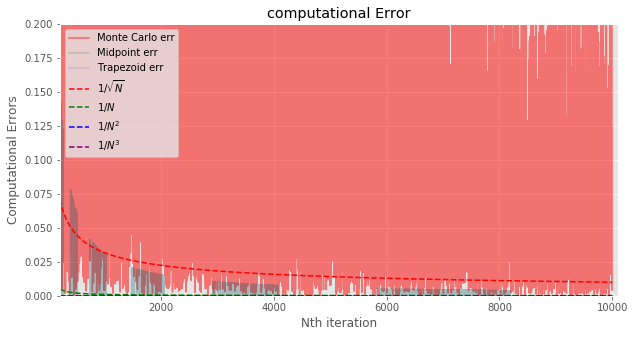

In [47]:

plt.figure(figsize=(10,5))
plt.style.use('ggplot')

## error plots
plt.plot(Na,mc_err   , '-',c='red'  , alpha=0.5,label = "Monte Carlo err")
plt.plot(Na,midpt_err, '-',c='green', alpha=0.2,label = "Midpoint err")
plt.plot(Na,trapz_err, '-',c='blue' , alpha=0.1,label = "Trapezoid err")

## curve plots
plt.plot(Na,1/np.sqrt(Na), '--',c='red'  , label = "$1/\sqrt{N} $")
plt.plot(Na,1/(Na**1)    , '--',c='green', label = "$1/N$")
plt.plot(Na,1/(Na**2)    , '--',c='blue' , label = "$1/N^2$")
plt.plot(Na,1/(Na**3)    , '--',c='purple',label = "$1/N^3$")

plt.ylim([0,0.2])
plt.xlim([200,N+100])
plt.xlabel("Nth iteration")
plt.ylabel("Computational Errors")
plt.title('computational Error')
plt.legend()
# 
plt.show()

# plot timing 

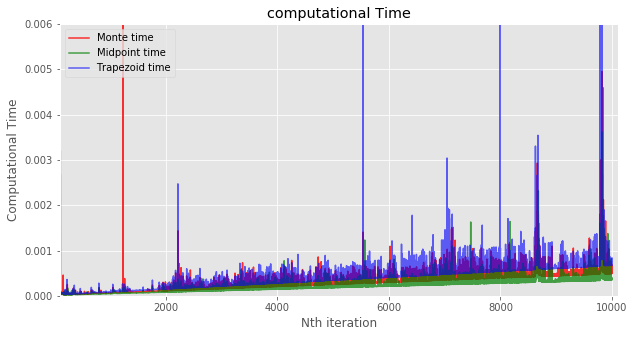

In [48]:

plt.figure(figsize=(10,5))
plt.style.use('ggplot')

## timing plots
plt.plot(Na,mc_time   , '-',c='red'  , alpha=0.8,label = "Monte time")
plt.plot(Na,midpt_time, '-',c='green', alpha=0.7,label = "Midpoint time")
plt.plot(Na,trapz_time, '-',c='blue' , alpha=0.6,label = "Trapezoid time")

plt.ylim([0,0.006])
plt.xlim([100,N+100])
plt.xlabel("Nth iteration")
plt.ylabel("Computational Time")
plt.title('computational Time')
plt.legend()
# 
plt.show()